# Load image data and save to one file

In [1]:
from os import listdir
from os.path import isfile, join

datadir = 'images'
imgfiles = [f for f in listdir(datadir) if isfile(join(datadir, f))]

print(imgfiles)

['cam_119_1.jpg', 'cam_33_0.jpg', 'cam_89_0.jpg', 'cam_30_2.jpg', 'cam_33_1.jpg', 'cam_30_1.jpg', 'cam_137_2.jpg', 'cam_76_2.jpg', 'cam_95_0.jpg', 'cam_8_0.jpg', 'cam_91_0.jpg', 'cam_34_1.jpg', 'cam_29_0.jpg', 'cam_99_0.jpg', 'cam_116_2.jpg', 'cam_49_2.jpg', 'cam_141_2.jpg', 'cam_87_0.jpg', 'cam_94_0.jpg', 'cam_61_1.jpg', 'cam_75_2.jpg', 'cam_90_0.jpg', 'cam_1_0.jpg', 'cam_62_1.jpg', 'cam_111_2.jpg', 'cam_82_2.jpg', 'cam_64_1.jpg', 'cam_35_2.jpg', 'cam_40_0.jpg', 'cam_31_0.jpg', 'cam_113_2.jpg', 'cam_32_1.jpg', 'cam_53_2.jpg', 'cam_34_0.jpg', 'cam_63_1.jpg', 'cam_136_2.jpg', 'cam_66_0.jpg', 'cam_2_0.jpg', 'cam_135_2.jpg', 'cam_26_2.jpg', 'cam_31_1.jpg', 'cam_11_0.jpg', 'cam_105_2.jpg', 'cam_127_2.jpg', 'cam_23_0.jpg', 'cam_46_0.jpg', 'cam_77_2.jpg', 'cam_138_2.jpg', 'cam_42_0.jpg', 'cam_140_2.jpg', 'cam_5_0.jpg', 'cam_36_0.jpg', 'cam_24_0.jpg', 'cam_139_2.jpg', 'cam_38_2.jpg', 'cam_107_2.jpg', 'cam_93_0.jpg', 'cam_71_2.jpg', 'cam_121_1.jpg', 'cam_118_1.jpg', 'cam_25_0.jpg', 'cam_32_0.j

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

train_samples, validation_samples = train_test_split(imgfiles, test_size=0.3)

print(len(train_samples))
print(train_samples)
print(len(validation_samples))
print(validation_samples)

115
['cam_122_1.jpg', 'cam_59_1.jpg', 'cam_28_0.jpg', 'cam_85_2.jpg', 'cam_78_2.jpg', 'cam_76_2.jpg', 'cam_50_2.jpg', 'cam_19_0.jpg', 'cam_58_1.jpg', 'cam_80_2.jpg', 'cam_16_0.jpg', 'cam_17_0.jpg', 'cam_23_0.jpg', 'cam_26_0.jpg', 'cam_37_0.jpg', 'cam_140_2.jpg', 'cam_75_2.jpg', 'cam_33_0.jpg', 'cam_0_0.jpg', 'cam_116_2.jpg', 'cam_113_2.jpg', 'cam_30_0.jpg', 'cam_112_2.jpg', 'cam_44_0.jpg', 'cam_21_0.jpg', 'cam_68_2.jpg', 'cam_25_0.jpg', 'cam_132_2.jpg', 'cam_43_2.jpg', 'cam_43_0.jpg', 'cam_48_2.jpg', 'cam_34_1.jpg', 'cam_15_0.jpg', 'cam_14_0.jpg', 'cam_138_2.jpg', 'cam_109_2.jpg', 'cam_47_0.jpg', 'cam_3_0.jpg', 'cam_72_2.jpg', 'cam_74_2.jpg', 'cam_120_1.jpg', 'cam_115_2.jpg', 'cam_27_2.jpg', 'cam_124_2.jpg', 'cam_32_0.jpg', 'cam_126_2.jpg', 'cam_7_0.jpg', 'cam_11_0.jpg', 'cam_84_2.jpg', 'cam_137_2.jpg', 'cam_65_0.jpg', 'cam_36_2.jpg', 'cam_8_0.jpg', 'cam_62_1.jpg', 'cam_94_0.jpg', 'cam_38_2.jpg', 'cam_54_2.jpg', 'cam_34_0.jpg', 'cam_34_2.jpg', 'cam_93_0.jpg', 'cam_10_0.jpg', 'cam_135_2

True

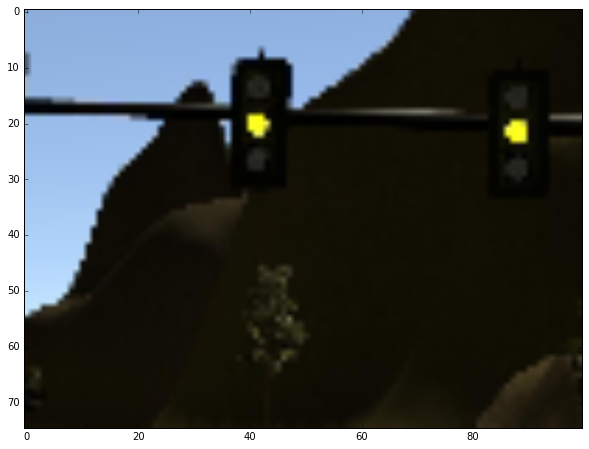

In [3]:
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image
import re
import numpy as np

# Visualizations will be shown in the notebook.
%matplotlib inline


a =cv2.imread(datadir + '/'+train_samples[0])
a = cv2.resize(a,(100,75))

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(a.astype(np.uint8), cv2.COLOR_BGR2RGB))

cv2.imwrite('tmp.jpg',a)

In [4]:
# load data from folders
def loadData(samples):
    X_train = []
    Y_train = []

    for sample in samples:
        noise = np.random.randint(0, 3, size=(75, 100, 3))
        a =cv2.imread(datadir + '/'+sample)
        a = cv2.resize(a,(100,75)) + noise
        a[a<0]=0
        a[a>255] = 255

        #r = ndimage.rotate(a, np.random.randint(0,10)-5)
        r = Image.fromarray(a.astype(np.uint8), 'RGB')
        rot = r.rotate(np.random.randint(0,10)-5)
        im_flip = cv2.flip(a, 1)
        im_flip2 = cv2.flip(a, 0)

        X_train.extend([a, np.asarray(rot), im_flip, im_flip2])
        s = re.search(r'_\d\.jpg', sample)
        t = s.group()
        y = int(t[1:2])
        Y_train.extend([y,y,y,y])
        #print(sample+"\t" + str(y))
    return np.array(X_train), np.array(Y_train)


In [5]:
X_train,Y_train = loadData(train_samples)
X_valid, Y_valid = loadData(validation_samples)

print(X_train.shape)
print(Y_train.shape)
print(X_valid.shape)
print(Y_valid.shape)

(460, 75, 100, 3)
(460,)
(200, 75, 100, 3)
(200,)


In [6]:
import pickle

img_data = {"X_train":X_train,
       "Y_train":Y_train,
       "X_valid":X_valid,
       "Y_valid":Y_valid}

pickle.dump( img_data, open( "img_data_tl.p", "wb" ) )

## Visualize rotation and noise

True

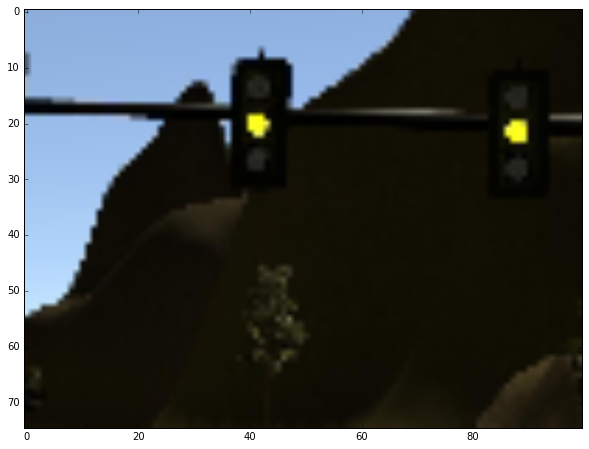

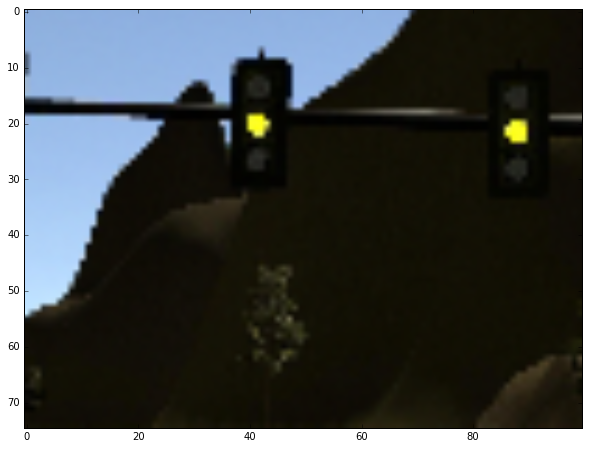

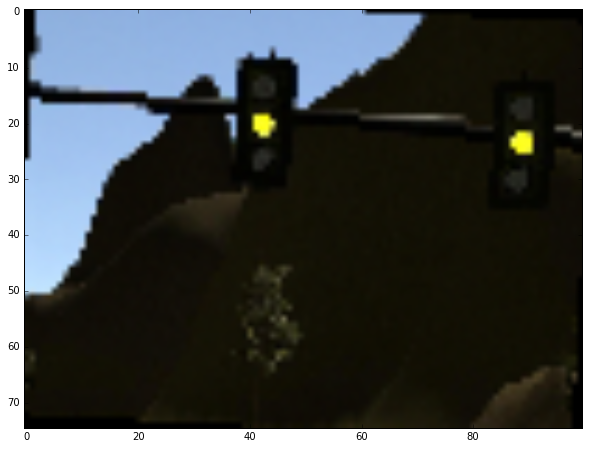

In [7]:

a =cv2.imread(datadir + '/'+train_samples[0])
a = cv2.resize(a,(100,75))

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(a.astype(np.uint8), cv2.COLOR_BGR2RGB))

noise = np.random.randint(0, 3, size=(75, 100, 3))
a = a + noise
a[a>255] = 255

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(a.astype(np.uint8), cv2.COLOR_BGR2RGB))

r = Image.fromarray(a.astype(np.uint8), 'RGB')
rot = np.asarray(r.rotate(np.random.randint(0,10)-5))

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(rot.astype(np.uint8), cv2.COLOR_BGR2RGB))

cv2.imwrite('tmp.jpg',a)

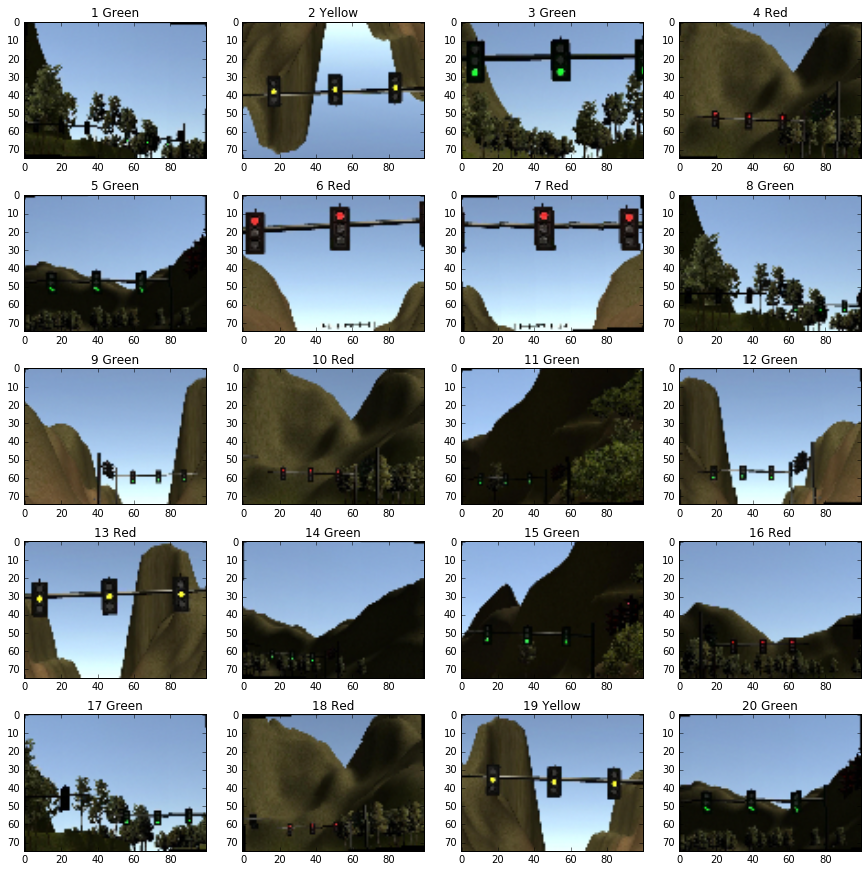

In [8]:

plt.figure(1, figsize=(15,15))

lightC = ["Red","Yellow","Green"]
for test in range(20):
    idx = np.random.randint(0,X_train.shape[0])
    im = np.squeeze(X_train[idx,:,:,:])
    
    plt.subplot(5,4, test+1)
    plt.title(str(test+1)+' '+lightC[Y_train[idx]])
    plt.imshow(cv2.cvtColor(im.astype(np.uint8), cv2.COLOR_BGR2RGB))
    
    #print(str(test)+'  '+str(idx) + '\t' + str(idx/4)+'\t'+ str(Y_train[idx])+' '+lightC[Y_train[idx]])

In [9]:
print(Y_train)

[1 1 1 1 1 1 1 1 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 1 1 1 2
 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0
 0 0 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 2 2 2
 2 2 2 2 2 0 0 0 0 2 2 2 2 1 1 1 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 0
 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 0 0 0 0 1 1 1 1 0 0 0 0 2 2
 2 2 2 2 2 2 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 2 2 2 2 1 1 1 1 2 2 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 1 1 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 0 0 0 0 2 2 2 2 0 0 0 0 0
 0 0 0 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 0 0 0 0 1 1 1 1 0 0 0 0 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 1 1 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2
 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2]
